#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###PhD. María de la Paz Rico Fdz

## **Actividad de la Semana 5**
###**Repaso Transformación y reducción de dimensiones.**
###**Fecha de entrega: 27/10/2022.**

## **Alumno: Maximiliano Morones Gómez**
## **Matrícula: A01793815**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [19]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
print("W")
print(W)
Winv = np.linalg.inv(W)
print("Winv")
print(Winv)
D = np.diag(values)
print("D")
print(D)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
B=np.dot(W,D)
B=np.dot(B,Winv)
print(B.round(2))
print("El resultado de B=W*D*Winv si es igual al resultado de A")
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
W
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
Winv
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]
D
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.30367773e-15]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
El resultado de B=W*D*Winv si es igual al resultado de A
-----------------------------


In [14]:
# Función para la descomposición y reconstrucción
def pca(X):
  print("-----Matriz original-----")
  print(X)
  print("-------------------------")
  #Calculo de los valores y vectores eigen
  values, vectors = eig(X)
  #Definición de W, Winv y D
  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)
  #Reconstrucción de matriz
  print("-----Matriz reconstruida-----")
  B=np.dot(W,D)
  B=np.dot(B,Winv)
  print(B.round(2))
  print("------------------------")

In [15]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
pca(A1)

-----Matriz original-----
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-------------------------
-----Matriz reconstruida-----
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
------------------------


In [17]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
pca(A2)

-----Matriz original-----
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-------------------------
-----Matriz reconstruida-----
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
------------------------


In [18]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
pca(A3)

-----Matriz original-----
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-------------------------
-----Matriz reconstruida-----
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


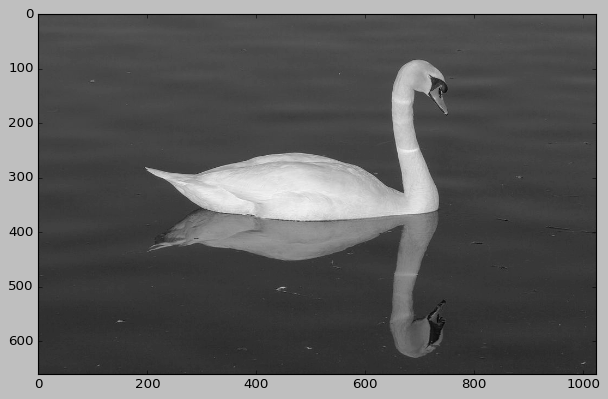

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F0BBD1ADA50>


In [20]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [21]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [22]:
U.shape

(660, 660)

In [23]:
V.shape

(1024, 1024)

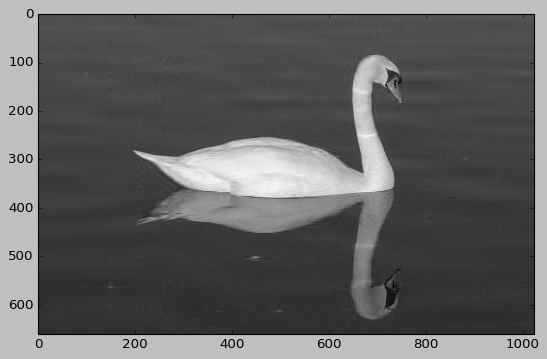

Felicidades la imagen está comprimida


In [24]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

[43. 43. 43. ... 27. 27. 27.]


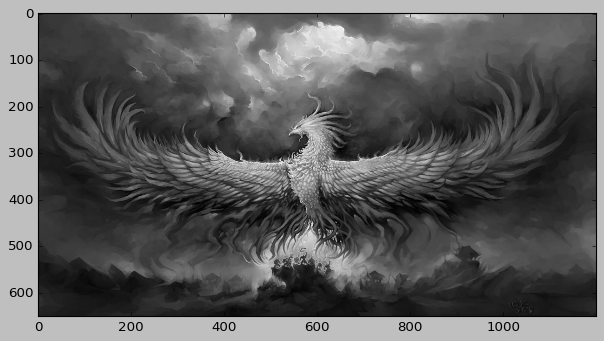

<PIL.Image.Image image mode=LA size=1200x650 at 0x7F0BBB385490>


In [58]:
#imagen 1
from six.moves import urllib
from PIL import Image 
import numpy as np
from matplotlib import pyplot as pit

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.seresmitologicos.net/wp-content/uploads/2011/05/fenix.jpg')).convert('LA')
#img = Image.open('Fenix.jpeg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [59]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(650, 1200)

In [60]:
U.shape

(650, 650)

In [61]:
V.shape

(1200, 1200)

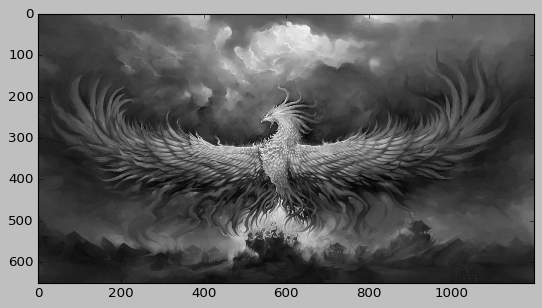

Felicidades la imagen está comprimida


In [63]:
nvalue = 200
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[56. 57. 57. ... 32. 32. 32.]


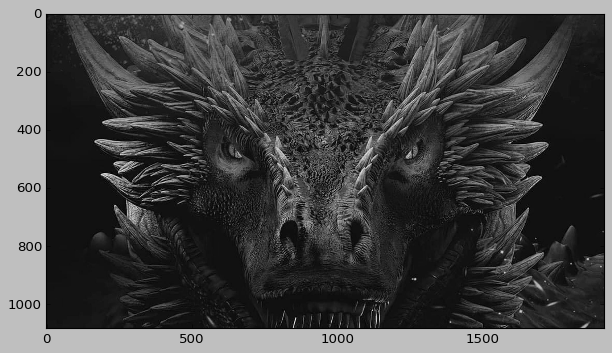

<PIL.Image.Image image mode=LA size=1920x1080 at 0x7F0BBB192E90>


In [65]:
#imagen 2
from six.moves import urllib
from PIL import Image 
import numpy as np
from matplotlib import pyplot as pit

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://sm.ign.com/ign_latam/news/n/new-house-/new-house-of-the-dragon-details-revealed-along-with-fresh-im_pkq1.jpg')).convert('LA')
#img = Image.open('Dragon.jpeg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [66]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(1080, 1920)

In [67]:
U.shape

(1080, 1080)

In [68]:
V.shape

(1920, 1920)

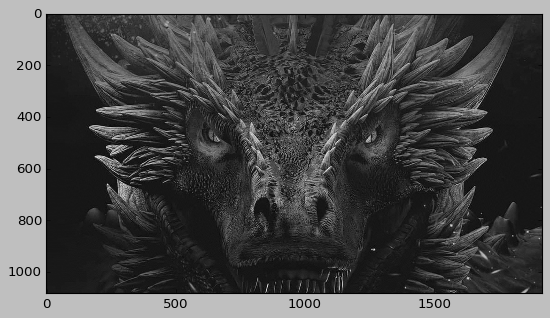

Felicidades la imagen está comprimida


In [69]:
nvalue = 400
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[255. 255. 254. ... 255. 255. 255.]


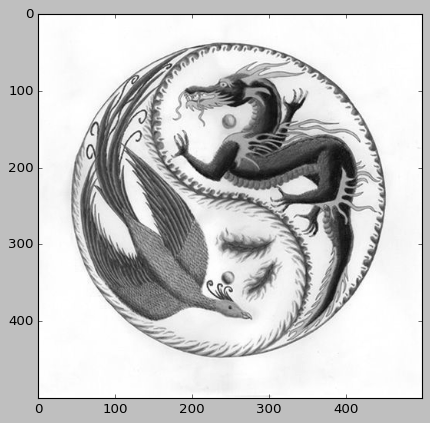

<PIL.Image.Image image mode=LA size=500x500 at 0x7F0BBB093590>


In [70]:
#imagen 3
from six.moves import urllib
from PIL import Image 
import numpy as np
from matplotlib import pyplot as pit

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://i.pinimg.com/originals/df/8f/19/df8f19cbc7550f25abcd59d51195cf0b.jpg')).convert('LA')
#img = Image.open('Dragon.jpeg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [71]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(500, 500)

In [72]:
U.shape

(500, 500)

In [73]:
V.shape

(500, 500)

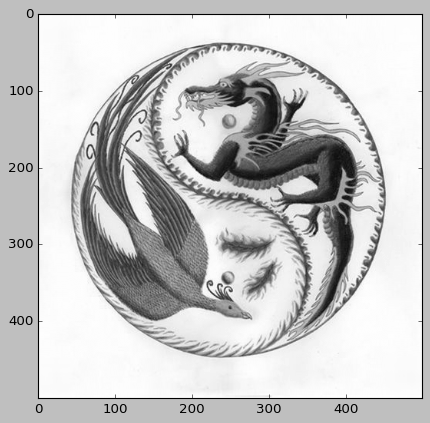

Felicidades la imagen está comprimida


In [74]:
nvalue = 300
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

¿Qué es feature importance y para qué nos sirve?
#####Feature importance puede ser visto como la importancia que puede llegar a tener cada una de las características, la cual podemos ver reflejada en la magnitud de los valores correspondientes en cada uno de los vectores. Sin pasar por alto que su principal proposito, es el de ayudar a identificar las características más importantes de los componentes principales.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
#####La explicación que se brinda mediante un ejemplo, ya que de esta manera es más fácil comprender cómo se aplica PCA.

¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
#####Al momento de realizar procesamiento de datos es bastante útil, más específicamente donde existe multicolinealidad.